# Importing the required Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact

# Importing Data Set

In [2]:
df = pd.read_csv("Oil and Gas 1932-2014.csv")

In [3]:
df.isna().sum(),df.shape

(cty_name                            0
 iso3numeric                         0
 id                                415
 year                                0
 eiacty                           1267
 oil_prod32_14                    5418
 oil_price_2000                     18
 oil_price_nom                       0
 oil_value_nom                    5418
 oil_value_2000                   5418
 oil_value_2014                   5418
 gas_prod55_14                    6709
 gas_price_2000_mboe                 0
 gas_price_2000                   4301
 gas_price_nom                       0
 gas_value_nom                    6709
 gas_value_2000                   6709
 gas_value_2014                   6709
 oil_gas_value_nom                5287
 oil_gas_value_2000               5287
 oil_gas_value_2014               5287
 oil_gas_valuePOP_nom             5449
 oil_gas_valuePOP_2000            5449
 oil_gas_valuePOP_2014            5449
 oil_exports                     11011
 net_oil_exports         

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15521 entries, 0 to 15520
Data columns (total 41 columns):
cty_name                        15521 non-null object
iso3numeric                     15521 non-null int64
id                              15106 non-null object
year                            15521 non-null int64
eiacty                          14254 non-null object
oil_prod32_14                   10103 non-null float64
oil_price_2000                  15503 non-null float64
oil_price_nom                   15521 non-null float64
oil_value_nom                   10103 non-null float64
oil_value_2000                  10103 non-null float64
oil_value_2014                  10103 non-null float64
gas_prod55_14                   8812 non-null float64
gas_price_2000_mboe             15521 non-null float64
gas_price_2000                  11220 non-null float64
gas_price_nom                   15521 non-null float64
gas_value_nom                   8812 non-null float64
gas_value_2000      

# Production Part Only

## Selecting the Oil Production Part Only

In [5]:
req = ['cty_name','iso3numeric','id','year','eiacty']
req.extend([i for i in df.columns if 'oil' in i and 'export' not in i and 'gas' not in i])
oilproduction = df[req]

In [6]:
oilproduction

,cty_name,iso3numeric,id,year,eiacty,oil_prod32_14,oil_price_2000,oil_price_nom,oil_value_nom,oil_value_2000,oil_value_2014
0,Afghanistan,4,AFG,1932,Afghanistan,NaN,10.860860,0.870000,NaN,NaN,NaN
1,Afghanistan,4,AFG,1933,Afghanistan,NaN,8.815239,0.670000,NaN,NaN,NaN
2,Afghanistan,4,AFG,1934,Afghanistan,NaN,12.715790,1.000000,NaN,NaN,NaN
3,Afghanistan,4,AFG,1935,Afghanistan,NaN,12.039690,0.970000,NaN,NaN,NaN
4,Afghanistan,4,AFG,1936,Afghanistan,NaN,13.383210,1.090000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
15516,Zimbabwe,716,ZWE,2010,Zimbabwe,0.0,62.778052,79.495534,0.0,0.0,0.0
15517,Zimbabwe,716,ZWE,2011,Zimbabwe,0.0,85.170708,111.255598,0.0,0.0,0.0
15518,Zimbabwe,716,ZWE,2012,Zimbabwe,0.0,83.754465,111.669702,0.0,0.0,0.0
15519,Zimbabwe,716,ZWE,2013,Zimbabwe,0.0,80.319530,108.658518,0.0,0.0,0.0


### total oil production for respective city

In [7]:
oilProdcity = pd.DataFrame(oilproduction[['cty_name','oil_prod32_14']].groupby(['cty_name']).sum()).reset_index();oilProdcity

,cty_name,oil_prod32_14
0,Afghanistan,0.000000e+00
1,Albania,5.894998e+07
2,Algeria,2.790063e+09
3,Angola,1.589131e+09
4,Argentina,1.548014e+09
...,...,...
182,"Yemen, Dem. Rep. (South Yemen)",0.000000e+00
183,"Yemen, Rep.",3.914048e+08
184,"Yugoslavia, Fed. Rep.",1.005658e+08
185,Zambia,0.000000e+00


### Places with no contribution in Oil Productions


In [8]:
no_oilprod = [i for i in oilProdcity.loc[oilProdcity.oil_prod32_14 == 0]['cty_name']];print(no_oilprod);len(no_oilprod)

['Afghanistan', 'Armenia', 'Bahamas, The', 'Belgium', 'Bhutan', 'Bosnia and Herzegovina', 'Botswana', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cape Verde', 'Central African Republic', 'Comoros', 'Costa Rica', 'Cyprus', 'Djibouti', 'Dominican Republic', 'El Salvador', 'Eritrea', 'Ethiopia', 'Ethiopia including Eritrea', 'Fiji', 'Finland', 'Gambia, The', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras', 'Iceland', 'Ireland', 'Jamaica', 'Kenya', 'Korea, Dem. Rep.', 'Korea, Rep.', 'Lao PDR', 'Latvia', 'Lebanon', 'Lesotho', 'Liberia', 'Luxembourg', 'Macedonia, FYR', 'Madagascar', 'Malawi', 'Maldives', 'Mali', 'Malta', 'Mauritius', 'Moldova', 'Montenegro', 'Mozambique', 'Namibia', 'Nepal', 'Nicaragua', 'North Vietnam', 'Panama', 'Paraguay', 'Portugal', 'Rwanda', 'Sierra Leone', 'Singapore', 'Solomon Islands', 'Somalia', 'South Vietnam', 'Sri Lanka', 'Swaziland', 'Switzerland', 'Tanzania', 'Togo', 'Uganda', 'Uruguay', 'Yemen, Dem. Rep. (South Yemen)', 'Zambia', 'Zimbabwe']


74

 __There are 74 city have no contribution on oil Production

### Top 10 Places with highest contribution on oil production

               cty_name  oil_prod32_14
176       United States   2.773979e+10
138  Russian Federation   2.440140e+10
140        Saudi Arabia   1.916382e+10
153        Soviet Union   1.467100e+10
79   Iran, Islamic Rep.   9.617339e+09
179       Venezuela, RB   9.180203e+09
33                China   6.295581e+09
91               Kuwait   6.167662e+09
110              Mexico   5.910809e+09
80                 Iraq   5.197307e+09


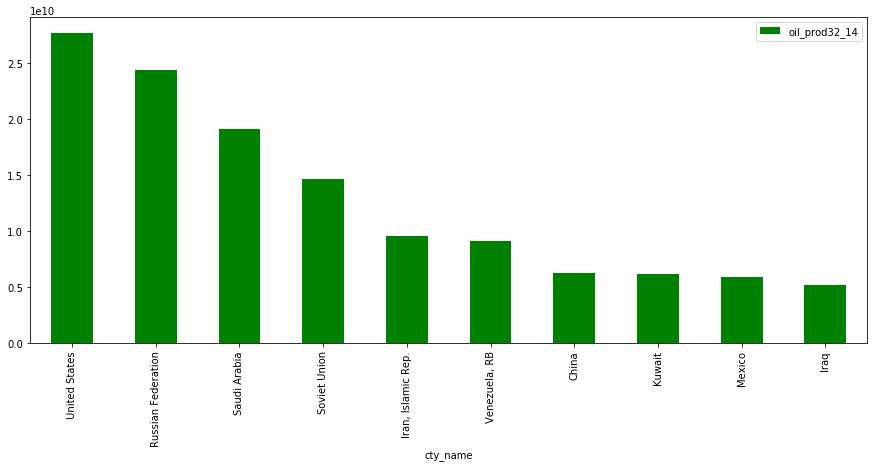

In [9]:
print(oilProdcity.sort_values('oil_prod32_14',ascending=False).head(10))
fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot(1,1,1)
oilProdcity.sort_values('oil_prod32_14',ascending=False).head(10).plot(x ='cty_name' ,y='oil_prod32_14',kind = 'bar',color='green',ax=ax)
                                                                       

### Oil Production over decades

In [10]:
oilProdyear=pd.DataFrame(oilproduction[['year','oil_prod32_14']].groupby('year').sum()).reset_index()
print(oilProdyear.sort_values('oil_prod32_14',ascending=False).head(10))

    year  oil_prod32_14
82  2014   3.837105e+09
81  2013   3.776015e+09
80  2012   3.755662e+09
47  1979   3.739902e+09
79  2011   3.666481e+09
58  1990   3.659606e+09
78  2010   3.649273e+09
57  1989   3.633945e+09
76  2008   3.622378e+09
48  1980   3.617329e+09


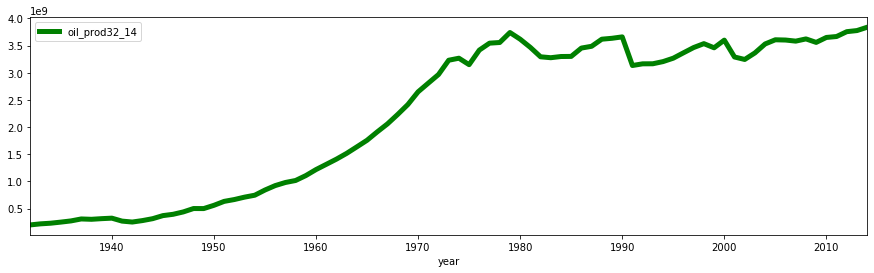

In [11]:
fig = plt.figure(figsize=(15,4))
ax = fig.add_subplot(1,1,1)
oilProdyear.plot(x = 'year',y = 'oil_prod32_14',kind = 'line',ax=ax,linewidth=5,c='green')
plt.show()

## Selecting the Gas Production Part Only

In [12]:
req = ['cty_name','iso3numeric','id','year','eiacty']
req.extend([i for i in df.columns if 'gas' in i and 'export' not in i and 'oil' not in i])
gasproduction = df[req]

In [13]:
gasproduction

,cty_name,iso3numeric,id,year,eiacty,gas_prod55_14,gas_price_2000_mboe,gas_price_2000,gas_price_nom,gas_value_nom,gas_value_2000,gas_value_2014
0,Afghanistan,4,AFG,1932,Afghanistan,NaN,0.000000e+00,NaN,0.060000,NaN,NaN,NaN
1,Afghanistan,4,AFG,1933,Afghanistan,NaN,0.000000e+00,NaN,0.060000,NaN,NaN,NaN
2,Afghanistan,4,AFG,1934,Afghanistan,NaN,0.000000e+00,NaN,0.060000,NaN,NaN,NaN
3,Afghanistan,4,AFG,1935,Afghanistan,NaN,0.000000e+00,NaN,0.060000,NaN,NaN,NaN
4,Afghanistan,4,AFG,1936,Afghanistan,NaN,0.000000e+00,NaN,0.060000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
15516,Zimbabwe,716,ZWE,2010,Zimbabwe,0.0,1.915340e+07,3.537880,4.480000,0.0,0.0,0.0
15517,Zimbabwe,716,ZWE,2011,Zimbabwe,0.0,1.637074e+07,3.023886,3.950000,0.0,0.0,0.0
15518,Zimbabwe,716,ZWE,2012,Zimbabwe,0.0,1.080083e+07,1.995052,2.660000,0.0,0.0,0.0
15519,Zimbabwe,716,ZWE,2013,Zimbabwe,0.0,1.483600e+07,2.740400,3.707290,0.0,0.0,0.0


### Top 10 Places with highest contribution on Gas production

In [14]:
gasProdcity = pd.DataFrame(gasproduction[['cty_name','gas_prod55_14']].groupby(['cty_name']).sum()).reset_index()
gasProdcity.sort_values('gas_prod55_14',ascending=False).head(10)

,cty_name,gas_prod55_14
176,United States,230841.395522
138,Russian Federation,166099.951904
153,Soviet Union,75046.012365
28,Canada,45192.481569
2,Algeria,28507.412153
79,"Iran, Islamic Rep.",23486.333617
119,Netherlands,21824.475517
175,United Kingdom,18336.162824
125,Norway,16943.140489
140,Saudi Arabia,15851.259404


### Places with no Gas Production

In [15]:
no_gasprod = [i for i in gasProdcity.loc[gasProdcity.gas_prod55_14 == 0]['cty_name']];print(no_gasprod);len(no_gasprod)

['Armenia', 'Bahamas, The', 'Belize', 'Benin', 'Bhutan', 'Bosnia and Herzegovina', 'Botswana', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cape Verde', 'Central African Republic', 'Comoros', 'Costa Rica', 'Cyprus', 'Djibouti', 'Dominican Republic', 'East Timor', 'El Salvador', 'Eritrea', 'Estonia', 'Ethiopia', 'Ethiopia including Eritrea', 'Fiji', 'Gambia, The', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras', 'Iceland', 'Jamaica', 'Kenya', 'Korea, Dem. Rep.', 'Lao PDR', 'Latvia', 'Lebanon', 'Lesotho', 'Liberia', 'Lithuania', 'Macedonia, FYR', 'Madagascar', 'Malawi', 'Maldives', 'Mali', 'Malta', 'Mauritania', 'Mauritius', 'Mongolia', 'Montenegro', 'Namibia', 'Nepal', 'Nicaragua', 'Niger', 'North Vietnam', 'Panama', 'Paraguay', 'Portugal', 'Sierra Leone', 'Singapore', 'Solomon Islands', 'Somalia', 'South Sudan', 'South Vietnam', 'Sri Lanka', 'Sudan', 'Sudan including South Sudan', 'Suriname', 'Swaziland', 'Sweden', 'Togo', 'Uganda', 'Uruguay', 'Yemen Arab Rep. (North Yemen)', 'Yeme

77

### Places with no Gas as well as no Oil Production

In [16]:
no_gas_oil_prod = [i for i in no_gasprod if i in no_oilprod];print(no_gas_oil_prod);len(no_gas_oil_prod)

['Armenia', 'Bahamas, The', 'Bhutan', 'Bosnia and Herzegovina', 'Botswana', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cape Verde', 'Central African Republic', 'Comoros', 'Costa Rica', 'Cyprus', 'Djibouti', 'Dominican Republic', 'El Salvador', 'Eritrea', 'Ethiopia', 'Ethiopia including Eritrea', 'Fiji', 'Gambia, The', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras', 'Iceland', 'Jamaica', 'Kenya', 'Korea, Dem. Rep.', 'Lao PDR', 'Latvia', 'Lebanon', 'Lesotho', 'Liberia', 'Macedonia, FYR', 'Madagascar', 'Malawi', 'Maldives', 'Mali', 'Malta', 'Mauritius', 'Montenegro', 'Namibia', 'Nepal', 'Nicaragua', 'North Vietnam', 'Panama', 'Paraguay', 'Portugal', 'Sierra Leone', 'Singapore', 'Solomon Islands', 'Somalia', 'South Vietnam', 'Sri Lanka', 'Swaziland', 'Togo', 'Uganda', 'Uruguay', 'Yemen, Dem. Rep. (South Yemen)', 'Zambia', 'Zimbabwe']


63

In [17]:
f"Number of countries with no contribution in gas production is {len(no_gasprod)} and  no contribution in oil Production is {len(no_oilprod)} and no contribution in gas as well as oil production is {len(no_gas_oil_prod)} "

'Number of countries with no contribution in gas production is 77 and  no contribution in oil Production is 74 and no contribution in gas as well as oil production is 63 '

### Places with only Oil Production

In [18]:
no_gas_but_oil = [i for i in no_gasprod if i not in no_oilprod];print(no_gas_but_oil);len(no_gas_but_oil)

['Belize', 'Benin', 'East Timor', 'Estonia', 'Lithuania', 'Mauritania', 'Mongolia', 'Niger', 'South Sudan', 'Sudan', 'Sudan including South Sudan', 'Suriname', 'Sweden', 'Yemen Arab Rep. (North Yemen)']


14

### Places with only gas Production

In [19]:
no_oil_but_gas = [i for i in no_oilprod if i not in no_gasprod];print(no_oil_but_gas);len(no_oil_but_gas)

['Afghanistan', 'Belgium', 'Finland', 'Ireland', 'Korea, Rep.', 'Luxembourg', 'Moldova', 'Mozambique', 'Rwanda', 'Switzerland', 'Tanzania']


11

### Gas Production over Decades

In [20]:
gasProdyear=pd.DataFrame(gasproduction[['year','gas_prod55_14']].groupby('year').sum()).reset_index()

In [21]:
gasProdyear.sort_values('gas_prod55_14',ascending=False).head(10)

,year,gas_prod55_14
79,2011,27352.200726
81,2013,26807.433347
78,2010,26624.278099
80,2012,26127.087616
76,2008,25879.080300
75,2007,24909.967798
77,2009,24736.674179
74,2006,24105.902227
73,2005,23481.238550
82,2014,23227.690200


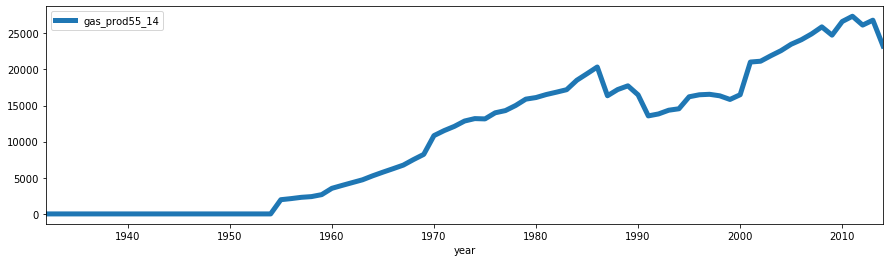

In [22]:
fig = plt.figure(figsize=(15,4))
ax = fig.add_subplot(1,1,1)
gasProdyear[['year','gas_prod55_14']].plot(x= 'year',kind = 'line',ax=ax,linewidth=5)

## Interactive Plot For Oil and Gas Production of City 

In [23]:
def oilgas(city,kind):
    fig = plt.figure(figsize=(15,4))
    ax1 = fig.add_subplot(1,2,1)
    ax2 = fig.add_subplot(1,2,2)
    if (city not in no_oilprod):
        df.loc[df['cty_name']==city][['year','oil_prod32_14']].plot(x= 'year',kind = kind,color = 'green',ax=ax1)
        ax1.set_title("Oil_Prod32_14")
    else:
        ax1.annotate(s = f"No Oil Production \n in {city}",xy = (0.5,0.5),ha='center',va='center',size=30,color='Green')
    if (city not in no_gasprod):
        df.loc[df['cty_name']==city][['year','gas_prod55_14']].plot(x= 'year',kind = kind,color='orange',ax=ax2)
        ax2.set_title("gas_prod55_14")
    else:
        ax2.annotate(s = f"No Gas Production \n in {city}",xy = (0.5,0.5),ha='center',va='center',size=30,color='orange')
    
interact(oilgas,city=[i for i in sorted(list(set(df.cty_name))) if i not in no_gas_oil_prod],kind=['line','hist','bar','box'])

interactive(children=(Dropdown(description='city', options=('Afghanistan', 'Albania', 'Algeria', 'Angola', 'Ar…

<function __main__.oilgas(city, kind)>

# Export Part Only

## Selecting the Oil Export Part Only

In [24]:
req = ['cty_name','iso3numeric','id','year','eiacty']
req.extend([i for i in df.columns if 'oil' in i and 'export' in i and 'gas' not in i])
oilExport = df[req]
oilExport

,cty_name,iso3numeric,id,year,eiacty,oil_exports,net_oil_exports,net_oil_exports_mt,net_oil_exports_value,net_oil_exports_valuePOP
0,Afghanistan,4,AFG,1932,Afghanistan,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,4,AFG,1933,Afghanistan,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,4,AFG,1934,Afghanistan,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,4,AFG,1935,Afghanistan,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,4,AFG,1936,Afghanistan,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
15516,Zimbabwe,716,ZWE,2010,Zimbabwe,0.0,0.0,0.0,0.0,0.0
15517,Zimbabwe,716,ZWE,2011,Zimbabwe,0.0,0.0,0.0,0.0,0.0
15518,Zimbabwe,716,ZWE,2012,Zimbabwe,0.0,0.0,0.0,0.0,0.0
15519,Zimbabwe,716,ZWE,2013,Zimbabwe,NaN,NaN,NaN,NaN,NaN


In [25]:
oilExportcty = pd.DataFrame(oilExport[['cty_name','oil_exports']].groupby('cty_name').sum()).reset_index()
oilExportcty

,cty_name,oil_exports
0,Afghanistan,0.00000
1,Albania,28.55423
2,Algeria,22011.99831
3,Angola,24957.84828
4,Argentina,3828.46748
...,...,...
182,"Yemen, Dem. Rep. (South Yemen)",0.00000
183,"Yemen, Rep.",5953.48050
184,"Yugoslavia, Fed. Rep.",0.00000
185,Zambia,0.00000


### City with No Oil Export 

In [26]:
no_oil_export = [i for i in set(oilExportcty.loc[oilExportcty.oil_exports == 0]['cty_name'])];print(no_oil_export);len(no_oil_export)

['Guinea-Bissau', 'Lao PDR', 'Montenegro', 'Togo', 'Burkina Faso', 'Dominican Republic', 'Bahamas, The', 'Burundi', 'Nicaragua', 'Afghanistan', 'Fiji', 'Zambia', 'German Democratic Republic (East Germany)', 'Uganda', 'Nepal', 'Federal Republic of Germany (West Germany)', 'Guinea', 'Sierra Leone', 'Yemen, Dem. Rep. (South Yemen)', 'Zimbabwe', 'Bhutan', 'South Vietnam', 'Eritrea', 'Serbia', 'Iceland', 'Bulgaria', 'Guyana', 'Jordan', 'Switzerland', 'Swaziland', 'Yugoslavia, Fed. Rep.', 'Taiwan', 'Luxembourg', 'Costa Rica', 'Mozambique', 'Cyprus', 'Uruguay', 'Lebanon', 'Gambia, The', 'Somalia', 'Yemen Arab Rep. (North Yemen)', 'Serbia and Montenegro', 'Malta', 'Kenya', 'Haiti', 'France including Algeria', 'Bosnia and Herzegovina', 'Malawi', 'North Vietnam', 'Paraguay', 'Botswana', 'Slovenia', 'Pakistan including East Pakistan', 'Armenia', 'Honduras', 'Lesotho', 'Madagascar', 'Namibia', 'Cambodia', 'Liberia', 'Cape Verde', 'Sri Lanka', 'Moldova', 'Soviet Union', 'Macedonia, FYR', 'Korea, De

85

### Top 10 places With highest Oil Export

                 cty_name   oil_exports
140          Saudi Arabia  164744.58064
138    Russian Federation   80960.52485
79     Iran, Islamic Rep.   62878.73387
125                Norway   59893.94013
174  United Arab Emirates   53310.14993
123               Nigeria   50244.10736
110                Mexico   46192.51427
179         Venezuela, RB   44790.80734
28                 Canada   43018.57472
175        United Kingdom   41024.95287


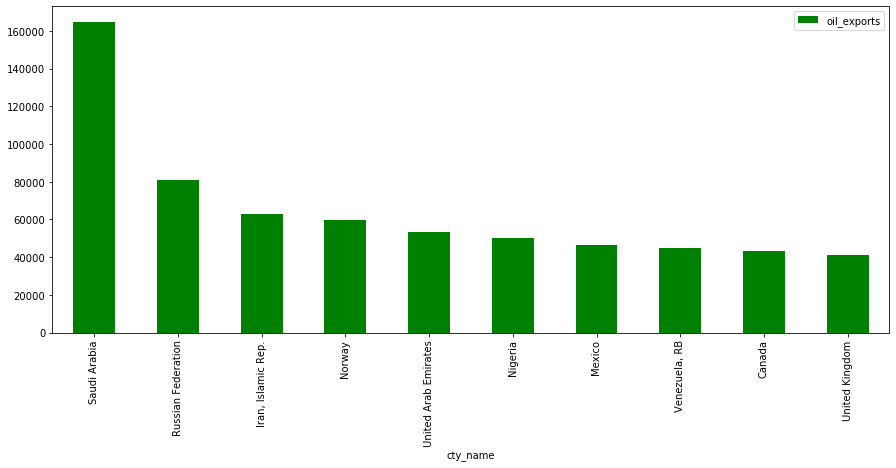

In [27]:
print(oilExportcty.sort_values('oil_exports',ascending=False).head(10))
fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot(1,1,1)
oilExportcty.sort_values('oil_exports',ascending=False).head(10).plot(x ='cty_name' ,y='oil_exports',kind = 'bar',color='green',ax=ax)                                                          

## Selecting the Gas Export Part 

In [28]:
req = ['cty_name','iso3numeric','id','year','eiacty']
req.extend([i for i in df.columns if 'gas' in i and 'export' in i and 'oil' not in i])
gasExport = df[req]
gasExport

,cty_name,iso3numeric,id,year,eiacty,gas_exports,net_gas_exports_bcf,net_gas_exports_mboe,net_gas_exports_value,net_gas_exports_valuePOP
0,Afghanistan,4,AFG,1932,Afghanistan,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,4,AFG,1933,Afghanistan,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,4,AFG,1934,Afghanistan,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,4,AFG,1935,Afghanistan,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,4,AFG,1936,Afghanistan,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
15516,Zimbabwe,716,ZWE,2010,Zimbabwe,0.0,0.0,0.0,0.0,0.0
15517,Zimbabwe,716,ZWE,2011,Zimbabwe,0.0,0.0,0.0,0.0,0.0
15518,Zimbabwe,716,ZWE,2012,Zimbabwe,0.0,0.0,0.0,0.0,0.0
15519,Zimbabwe,716,ZWE,2013,Zimbabwe,0.0,0.0,0.0,NaN,NaN


In [29]:
gasExportcty = pd.DataFrame(gasExport[['cty_name','gas_exports']].groupby('cty_name').sum()).reset_index()
gasExportcty

,cty_name,gas_exports
0,Afghanistan,0.00000
1,Albania,0.00000
2,Algeria,42425.58515
3,Angola,0.00000
4,Argentina,1900.65330
...,...,...
182,"Yemen, Dem. Rep. (South Yemen)",0.00000
183,"Yemen, Rep.",1090.88035
184,"Yugoslavia, Fed. Rep.",0.00000
185,Zambia,0.00000


### Places with no gas export

In [30]:
no_gas_export = [i for i in set(gasExportcty.loc[gasExportcty.gas_exports == 0]['cty_name'])];print(no_gas_export);len(no_gas_export)

['Guinea-Bissau', 'Lao PDR', 'East Timor', 'Montenegro', 'Belarus', 'Saudi Arabia', 'Togo', 'South Africa', 'Romania', 'Angola', 'Cuba', 'Burkina Faso', 'Pakistan', 'Niger', 'Dominican Republic', 'Bahamas, The', 'Kyrgyz Republic', 'Burundi', 'Nicaragua', 'Thailand', 'Afghanistan', 'Fiji', 'Zambia', 'Guatemala', 'Greece', 'German Democratic Republic (East Germany)', 'Uganda', 'Belize', 'Nepal', 'Mongolia', 'Federal Republic of Germany (West Germany)', 'Guinea', 'Sierra Leone', 'Yemen, Dem. Rep. (South Yemen)', 'Zimbabwe', 'Gabon', 'Bhutan', 'South Vietnam', 'Eritrea', 'Portugal', 'Estonia', 'Serbia', 'Iceland', 'Bulgaria', 'Kuwait', 'Guyana', 'Korea, Rep.', 'Israel', 'Jordan', 'Albania', 'Congo, Rep.', 'Switzerland', 'Philippines', 'Syrian Arab Republic', 'Swaziland', 'Suriname', 'Barbados', 'Yugoslavia, Fed. Rep.', 'India', 'Jamaica', 'Luxembourg', 'Costa Rica', 'Papua New Guinea', 'Cyprus', 'Uruguay', 'Lebanon', 'Gambia, The', 'Tajikistan', 'Benin', 'Somalia', 'Yemen Arab Rep. (North 

135

## Interactive plot for oil and gas exports with respective  decades

In [31]:
def Oil__Export(column):
    oilExportyear=pd.DataFrame(df.loc[df['year'] > 1985][['year',column]].groupby('year').sum()).reset_index()
    print(oilExportyear.sort_values(column,ascending=False).head(10))
    fig = plt.figure(figsize=(15,4))
    ax = fig.add_subplot(1,1,1)
    oilExportyear[['year',column]].plot(x= 'year',kind = 'line',ax=ax,linewidth=5)
interact(Oil__Export,column=[i for i in df.columns if 'export' in i ])

interactive(children=(Dropdown(description='column', options=('oil_exports', 'net_oil_exports', 'net_oil_expor…

<function __main__.Oil__Export(column)>

## Interactive plot for oil and gas exports with respective  decades and places

In [32]:
def oilgas(city,kind,col):
    cityl = [city]
    fig = plt.figure(figsize=(15,4))
    ax1 = fig.add_subplot(1,1,1)
    df.query(f"cty_name in {cityl} & year> 1985 ")[['year',col]].plot(x= 'year',kind = kind,color = 'green',ax=ax1,linewidth=3)
interact(oilgas,city=[i for i in set(df.cty_name)],kind=['line','hist'],col=[i for i in df.columns if 'oil' in i and 'export' in i or 'gas'  in i and 'export' in i])

interactive(children=(Dropdown(description='city', options=('Colombia', 'Guinea-Bissau', 'Poland', 'Lao PDR', …

<function __main__.oilgas(city, kind, col)>

In [33]:
df.oil_price_nom.value_counts()

1.800000     1870
1.930000      748
1.900000      561
1.710000      561
2.080000      374
             ... 
31.610000     187
35.930000     187
2.240000      187
18.226113     187
1.000000      187
Name: oil_price_nom, Length: 65, dtype: int64